<a href="https://colab.research.google.com/github/2021-FIIT-Bc-projects/BP-Fagan-CNN-Huby/blob/develop/Experiment_2_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pathlib
import PIL

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, RandomFlip, RandomRotation, RandomZoom

import os
import cv2
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/2vs2_2"
data_dir = pathlib.Path(data_dir)

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3700 files belonging to 4 classes.
Using 3330 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3700 files belonging to 4 classes.
Using 370 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['E_Boletus_reticulatus (1)', 'E_Cantharellus_cibarius', 'P_Amanita_muscaria (1)', 'P_Gyromitra_esculenta']


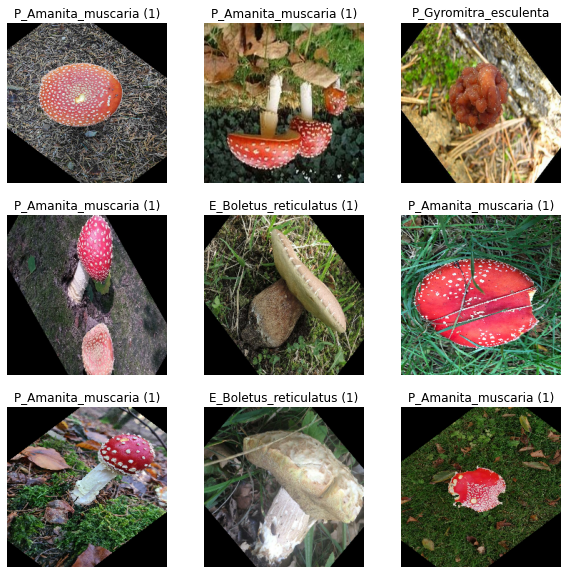

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

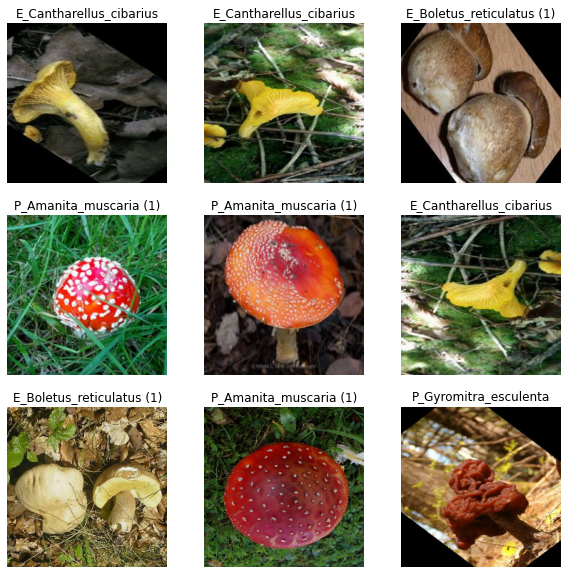

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
vgg = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False, classifier_activation="softmax") 

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  batch_size=32,shuffle=True)

Epoch 1/10
105/105 [==============================] - 724s 7s/step - loss: 2.2660 - accuracy: 0.9252 - val_loss: 0.8563 - val_accuracy: 0.9622
Epoch 2/10
105/105 [==============================] - 44s 394ms/step - loss: 0.2021 - accuracy: 0.9871 - val_loss: 0.6430 - val_accuracy: 0.9730
Epoch 3/10
105/105 [==============================] - 44s 394ms/step - loss: 0.1893 - accuracy: 0.9886 - val_loss: 0.6591 - val_accuracy: 0.9757
Epoch 4/10
105/105 [==============================] - 44s 394ms/step - loss: 0.2050 - accuracy: 0.9916 - val_loss: 0.7656 - val_accuracy: 0.9865
Epoch 5/10
105/105 [==============================] - 43s 393ms/step - loss: 0.0458 - accuracy: 0.9964 - val_loss: 0.6114 - val_accuracy: 0.9892
Epoch 6/10
105/105 [==============================] - 43s 390ms/step - loss: 0.0354 - accuracy: 0.9973 - val_loss: 0.4808 - val_accuracy: 0.9946
Epoch 7/10
105/105 [==============================] - 43s 389ms/step - loss: 0.0082 - accuracy: 0.9994 - val_loss: 0.5428 - val_accu

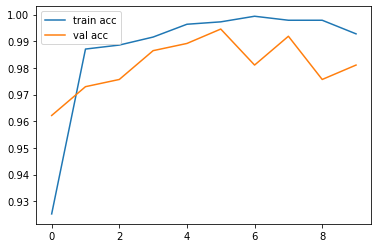

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('vgg-acc-rps-1.png')
plt.show()

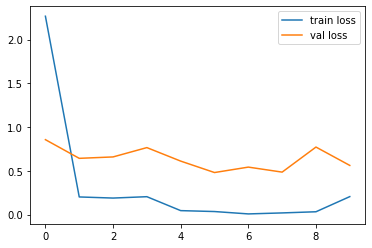

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

### **Testovanie modelu**

In [ ]:
test_path="/content/drive/MyDrive/Colab Notebooks/test_2vs2_2"

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 130 files belonging to 4 classes.


In [ ]:
model.evaluate(test_ds,batch_size=32)

5/5 [==============================] - 57s 245ms/step - loss: 0.8020 - accuracy: 0.9846


[0.8020386695861816, 0.9846153855323792]

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  seed=123,
  labels='inferred',
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 130 files belonging to 4 classes.


In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

array([[26,  0,  0,  0],
       [ 1, 17,  1,  0],
       [ 0,  0, 65,  0],
       [ 0,  0,  0, 20]], dtype=int32)

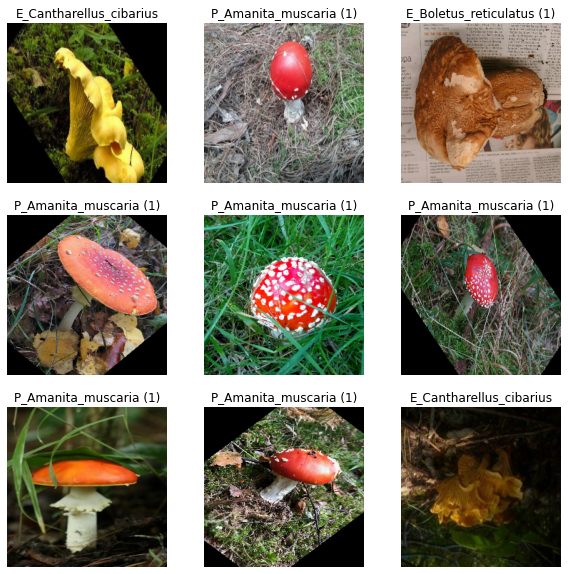

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### **Ukladanie modelu**

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/model_2_vs_2_99acc_98valacc_98testacc_29_12_2021_14_20')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/models/model_2_vs_2_99acc_98valacc_98testacc_29_12_2021_14_20/assets


In [ ]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/model_2_vs_2_99acc_98valacc_98testacc_29_12_2021_14_20')
model_loaded.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     